Created by Josef Matondang

https://josefmtd.com

In [1]:
import json
import urllib.request
import datetime

import numpy as np
import matplotlib.pyplot as plt

# Ambil Data dari JSON API

In [2]:
idBuoy = 1
url = 'http://buoymerahputih.id/data/getdata_json.php?idbuoy=' + str(idBuoy)
webUrl = urllib.request.urlopen(url)
data = webUrl.read()
jsonData = json.loads(data.decode('utf-8'))

timeSeries = jsonData['data']

# Ubah Data ke Time Series

In [3]:
dateTimeSeries = []
dataBuoySeries = []

for x in range(len(timeSeries)):
    # Get the datetime string and convert to datetime
    timeString = timeSeries[x]['date_time']
    dateTime = datetime.datetime.strptime(timeString, '%Y-%m-%d %H:%M:%S')
    
    # Get the raw data of buoy depth (in cm)
    dataBuoy = timeSeries[x]['data_pengukuran']
    
    # 
    dataBuoySeries.append(dataBuoy)
    dateTimeSeries.append(dateTime)

# Ubah Data ke Array

In [4]:
dataBuoyArray = np.array(dataBuoySeries)
dateTimeArray = np.array(dateTimeSeries)

# Data Raw ke Tinggi Muka Air

$$ z_i = \frac{x_i - x_0}{100} $$

In [5]:
x_0_buoy1 = 214851

tideBuoyArray = np.divide(np.subtract(dataBuoyArray, x_0_buoy1), 100)

# Plot Tinggi Muka Air

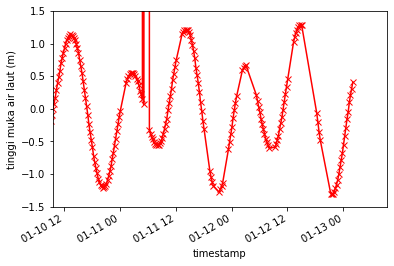

In [6]:
def plotHistoricalData (dayAgo):
    figure = plt.figure()
    axes1 = figure.add_subplot(111)
    axes1.set_ylabel('tinggi muka air laut (m)')
    axes1.set_xlabel('timestamp')
    axes1.plot(dateTimeArray, tideBuoyArray, marker = 'x', color = 'red')
    axes1.set_ylim(-1.5, 1.5)
    axes1.set_xlim(datetime.datetime.now() - datetime.timedelta(days = dayAgo),
                   datetime.datetime.now())
    plt.gcf().autofmt_xdate()
    plt.show()
    
plotHistoricalData(3)